In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/Users/dtorre/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


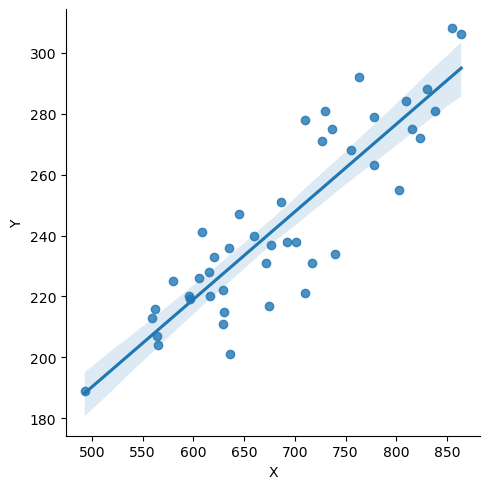

In [9]:
# Reading data
kangarooData = pd.read_csv('kangaroo.csv')

# Checking head
kangarooData.head()

# Creating a linear regression model and printing summary
lr_model = sm.OLS(kangarooData.Y, kangarooData.X).fit()
lr_model.summary()


# Visualizing the data points
sns.lmplot(x = 'X', y = 'Y', data = kangarooData)

In [10]:
# Now we will work on gradient descent
# Define our cost function
def cost(X, y, theta):
    return(sum(np.matmul(X, theta) - y)**2 / (2*len(y)))

# Initialize coefficients
theta = np.matrix([[0],[0]])
num_iterations = 10
alpha = 0.01

# Store the history
cost_history = [float(num_iterations)]
theta_history = [[num_iterations]]

# Appending ones
X = np.append(np.ones([len(kangarooData),1]), np.array(kangarooData.X).reshape(len(kangarooData.X),1), 1)

In [12]:
# Gradient descent algorithm
for i in range(1, num_iterations+1):
    error = np.matmul(X, theta) - np.array(kangarooData.Y).reshape(len(kangarooData.Y),1)
    delta = np.matmul(np.transpose(X), error) / len(kangarooData.Y)
    theta = theta - alpha * delta
    #print(theta)
    cost_history.append(cost(X, np.array(kangarooData.Y).reshape(len(kangarooData.Y),1), theta))
    theta_history.append([theta])

In [13]:
# Function to plot a line given slope and intercept
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

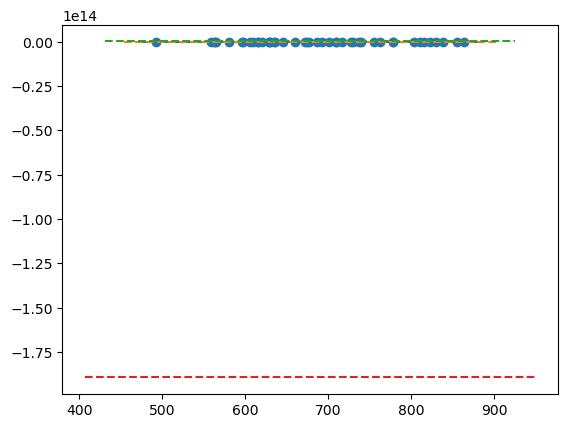

In [21]:
# Plotting the data 
plt.figure()
plt.scatter(kangarooData.X, kangarooData.Y)
abline(float(theta_history[1][0][0]), float(theta_history[1][0][1]))
abline(float(theta_history[1][0][0]), float(theta_history[2][0][1]))
abline(float(theta_history[1][0][0]), float(theta_history[3][0][1]))
abline(float(theta_history[1][0][0]), float(theta_history[4][0][1]))
plt.show()